# Comparaison des performances entre Vision Transformers (ViT) et Convolutional Neural Networks (CNN) pour la classification d’images

---

## Objectif principal
Comparer les performances de deux architectures pour la classification d’images :
- **Vision Transformers (ViT)** : Modèles basés sur l’attention, inspirés des transformers en NLP.
- **Convolutional Neural Networks (CNN)** : Modèles classiques utilisant des couches de convolution.

---

## Étapes clés du projet

### 1. Choix des jeux de données
- Sélectionner **au moins deux jeux de données étiquetés** pour la classification.
- **Motivation des choix** :
  - Variété des tailles (petits/grands datasets).
  - Complexité des images (ex. : objets simples vs. scènes naturelles).
  - Exemples possibles : CIFAR-10 (images simples), ImageNet (diversité élevée), ou des datasets spécialisés (médical, satellite).

### 2. Explication détaillée de l’architecture ViT
- **Principe** : Découper une image en *patches* (carreaux), traités comme des *tokens* (comme en NLP).
- **Composants clés** :
  - **Embedding des patches** : Transformation des patches en vecteurs via une couche linéaire.
  - **Positional Encoding** : Ajout d’informations spatiales (position des patches).
  - **Encoder** : Couches d’attention multi-têtes pour capturer les dépendances entre patches.
  - **Tête de classification** : Couche linéaire pour prédire la classe.

### 3. Sélection des architectures
- **ViT** : Exemples : ViT-Base, ViT-Large (selon la taille du dataset et les ressources).
- **CNN** : Exemples : ResNet-50, VGG-16, ou des modèles plus légers comme MobileNet.
- **Motivation** :
  - Équilibrer complexité et ressources disponibles.
  - Comparer des modèles "modernes" (ViT) vs. "classiques" (CNN).

### 4. Implémentation des modèles
- Utiliser **PyTorch** pour coder les architectures :
  - Pour les CNN : `Conv2d`, `MaxPool2d`, `Linear`.
  - Pour les ViT : Modules d’attention (`MultiheadAttention`), couches linéaires.
  - **Pas besoin de recoder** les mécanismes de base (attention, convolution).

### 5. Évaluation des performances
- **Métriques** : Précision (accuracy), perte (loss), temps d’entraînement/inférence, consommation mémoire.
- **Tableau comparatif** :

| Modèle       | Dataset 1 (Accuracy) | Dataset 2 (Accuracy) | Temps d’entraînement | Mémoire utilisée |
|--------------|----------------------|----------------------|----------------------|------------------|
| ViT-Base     | 92%                  | 88%                  | 10h                  | 12 Go            |
| ResNet-50    | 90%                  | 85%                  | 6h                   | 8 Go             |

### 6. Analyse des facteurs non liés à la performance
- **Dataset** : Les ViT nécessitent-ils plus de données que les CNN ?
- **Budget computationnel** : Coût en GPU/TPU pour l’entraînement.
- **Temps d’inférence** : Les ViT sont-ils plus lents à l’inférence ?
- **Interprétabilité** : Les CNN (via les *feature maps*) sont-ils plus interprétables que les ViT ?
- **Mémoire** : Empreinte mémoire des modèles (ex. : taille des poids).

### 7. Comparaison avec la littérature
- **Tendances actuelles** :
  - Les ViT surpassent souvent les CNN sur les **grands datasets** (ex. : ImageNet).
  - Les CNN restent compétitifs sur les **petits datasets** ou pour des tâches en temps réel.
  - **Hybrides** : Certains travaux combinent CNN et ViT (ex. : CNN comme *feature extractor* pour ViT).
- **Limites** :
  - Les ViT nécessitent des ressources importantes et des données massives.
  - Les CNN sont plus matures et optimisés pour le *edge computing*.

### 8. Bonus : Techniques d’explicabilité
- **Pour les CNN** :
  - **Grad-CAM** : Visualisation des zones importantes dans l’image.
  - **Feature Visualization** : Quelles caractéristiques activent les neurones ?
- **Pour les ViT** :
  - **Attention Maps** : Visualisation des patches les plus "attentifs".
  - **Attention Rollout** : Agrégation des couches d’attention pour interpréter les décisions.
- **Différences** :
  - Les CNN expliquent via des **régions spatiales** (ex. : contours, textures).
  - Les ViT expliquent via des **relations entre patches** (ex. : dépendances globales).

---

## Conclusion attendue
- **Quand choisir un ViT ?**
  - Si le dataset est **grand et varié**, et que les ressources sont suffisantes.
  - Pour des tâches nécessitant une **compréhension globale** de l’image.
- **Quand choisir un CNN ?**
  - Pour des **petits datasets** ou des contraintes de temps/mémoire.
  - Pour des applications **embarquées** ou en temps réel.
- **Perspectives** :
  - Les hybrides CNN-ViT pourraient dominer à l’avenir.
  - L’explicabilité reste un défi pour les ViT, mais des outils émergent.


## Choix des datasets

Nous allons prendre les datasets  MNIST, Fashion_MNIST, cifar10  car ils sont facilement importables depuis tensorflow.keras. On va utiliser [`Keras`](https://keras.io/) and [`Tensorflow`](https://www.tensorflow.org/) comme librairie pour pouvoir se baser sur les TPs existants déjà. 
## Description des datasets utilisés

| Dataset         | Description                                                                                     | Taille des images | Nombre de classes | Exemples de classes                                                                                     |
|-----------------|-------------------------------------------------------------------------------------------------|-------------------|-------------------|---------------------------------------------------------------------------------------------------------|
| **MNIST**       | Dataset de chiffres manuscrits en niveaux de gris, souvent utilisé comme benchmark en vision.    | 28x28 pixels      | 10                | 0, 1, 2, 3, 4, 5, 6, 7, 8, 9                                                                           |
| **Fashion-MNIST** | Dataset d'articles de mode en niveaux de gris, conçu comme une alternative plus complexe à MNIST. | 28x28 pixels      | 10                | T-shirt/top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, Ankle boot                     |
| **CIFAR-10**    | Dataset d'images couleur d'objets divers, plus complexe et varié que MNIST.                     | 32x32 pixels      | 10                | Avion, Voiture, Oiseau, Chat, Cerf, Chien, Grenouille, Cheval, Bateau, Camion                           |
 
On a aussi choisi ces 3 datasets de façon à avoir 10 classes partout, ce qui est plus simple pour la suite. 

In [13]:
# Utils
import os
import shutil
import time

# Maths - Stats
from sklearn.utils import shuffle
import numpy as np
import pandas as pd
import random as rd

# Data visualization
from matplotlib import pyplot as plt
import seaborn as sns

# Deep Learning Librairies
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

# tf.config.list_physical_devices()
[k.device_type for k in tf.config.list_physical_devices()]
# Nbre de classes communes pour les 3 datasets
N_classes=10


In [2]:
## Import des datasets
from tensorflow.keras.datasets import mnist, fashion_mnist, cifar10 

In [3]:
(x_train_mnist, y_train_mnist), (x_test_mnist, y_test_mnist) = mnist.load_data()
(x_train_Fmnist, y_train_Fmnist), (x_test_Fmnist, y_test_Fmnist) = fashion_mnist.load_data()
(x_train_cifar10, y_train_cifar10), (x_test_cifar10, y_test_cifar10) = cifar10.load_data()


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


## Visualisation des datasets

In [6]:
def describe_image_dataset(x_train, y_train, x_test, y_test, class_names=None, cmap="gray"):
    """
    Describe an image classification dataset using common statistics and visualizations.
    
    Parameters
    ----------
    x_train : np.ndarray
        Training images.
    y_train : np.ndarray
        Training labels.
    x_test : np.ndarray
        Test images.
    y_test : np.ndarray
        Test labels.
    class_names : list or None
        Optional list of class names. If None, classes are displayed as integers.
    cmap : str
        Matplotlib colormap for image display.
    """
    
    # --- Basic dataset information ---
    # Extract dataset shape (assume (N, H, W, ...) format)
    N_train = x_train.shape[0]
    N_test = x_test.shape[0]
    
    # Handle grayscale vs RGB images
    if x_train.ndim == 3:
        H, W = x_train.shape[1], x_train.shape[2]
        C = 1
    elif x_train.ndim == 4:
        H, W, C = x_train.shape[1], x_train.shape[2], x_train.shape[3]
    else:
        raise ValueError("Images must be shaped (N,H,W) or (N,H,W,C).")
        
    # Number of classes
    classes = np.unique(y_train)
    N_classes = len(classes)
    
    print("----- Dataset Description -----")
    print(f"Train data: {N_train} images ({H} × {W} pixels, {C} channels)")
    print(f"Test data : {N_test} images ({H} × {W} pixels, {C} channels)")
    print(f"Number of classes: {N_classes}")
    print("--------------------------------")
    
    
    # --- Distribution histograms (matplotlib) ---
    plt.figure()
    plt.hist(y_train, density=True, alpha=0.6, label='train set')
    plt.hist(y_test, density=True, alpha=0.4, label='test set')
    plt.title("Distribution in test and train sets")
    plt.legend()
    plt.show()
    
    
    # --- Distribution histograms (seaborn) ---
    plt.figure()
    sns.histplot(y_train, stat='proportion', discrete=True, alpha=.8, shrink=.8, label='Train set')
    sns.histplot(y_test, stat='proportion', discrete=True, alpha=.5, shrink=.8, label='Test set')
    
    plt.title("Number distribution in test and train sets")
    plt.legend()
    plt.show()
    
    
    # --- Display example images by class ---
    fig = plt.figure(figsize=(10, 5))
    
    for i in range(N_classes):
        ax = fig.add_subplot(2, (N_classes+1)//2, i+1)
        
        # Random sample from class i
        sample_index = rd.choice(np.where(y_train == i)[0])
        img = x_train[sample_index]
        
        # Remove channel dimension if needed
        if C == 1 and img.ndim == 3:
            img = img.squeeze()
        
        ax.imshow(img, cmap=cmap if C == 1 else None)
        
        label_name = class_names[i] if class_names else i
        ax.set_title(f"Class: {label_name}\nIdx: {sample_index}")
        ax.axis("off")
    
    plt.tight_layout()
    plt.show()

## MNIST


----- Dataset Description -----
Train data: 60000 images (28 × 28 pixels, 1 channels)
Test data : 10000 images (28 × 28 pixels, 1 channels)
Number of classes: 10
--------------------------------


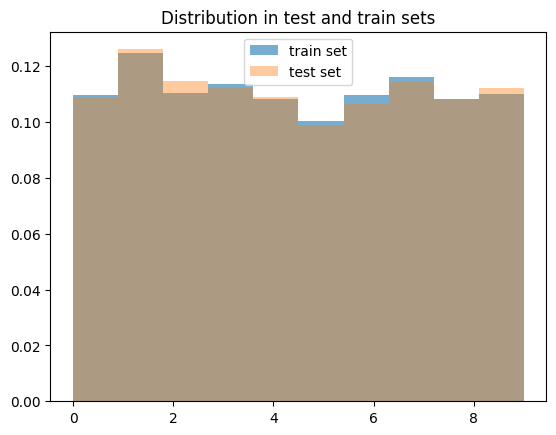

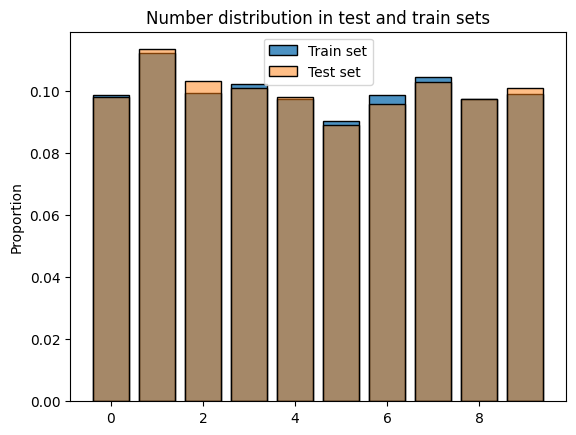

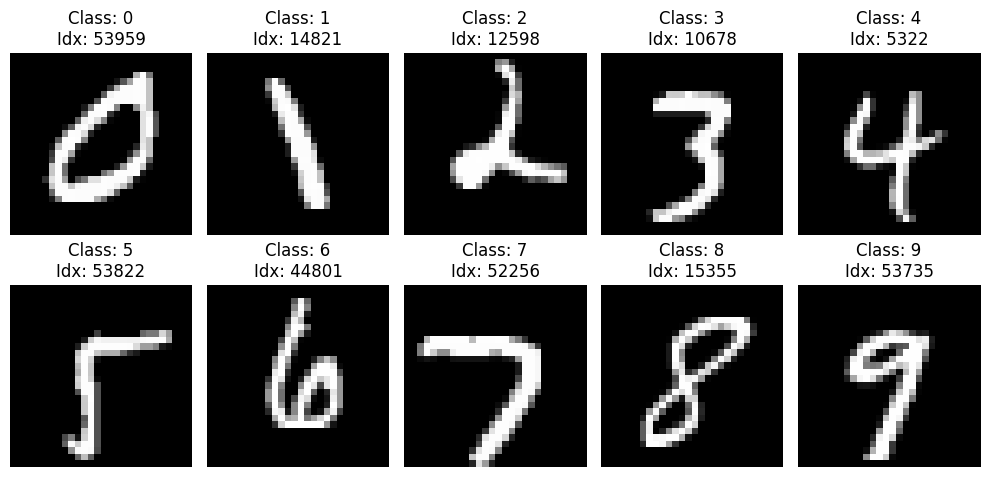

In [7]:
describe_image_dataset(
    x_train_mnist, y_train_mnist, 
    x_test_mnist, y_test_mnist,
    class_names=[str(i) for i in range(10)],
    cmap="gray"
)

## Fashio_MNIST

----- Dataset Description -----
Train data: 60000 images (28 × 28 pixels, 1 channels)
Test data : 10000 images (28 × 28 pixels, 1 channels)
Number of classes: 10
--------------------------------


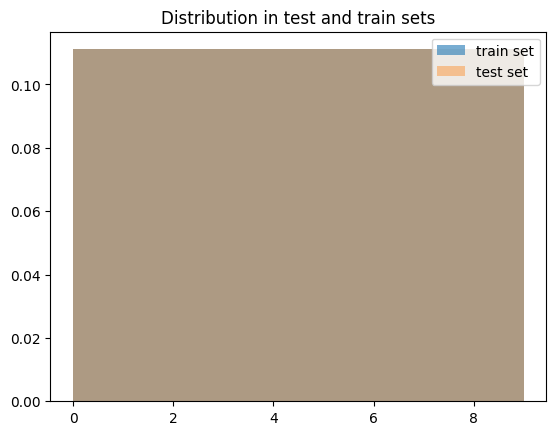

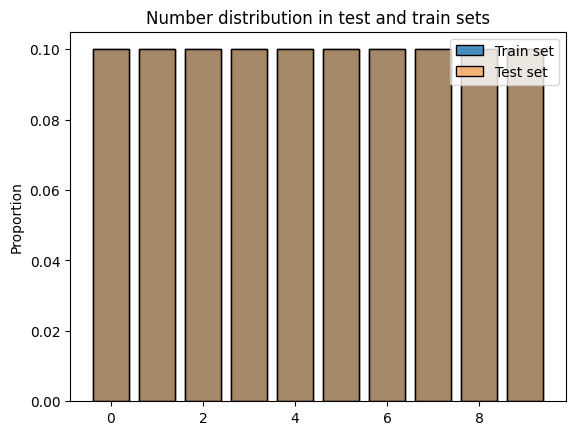

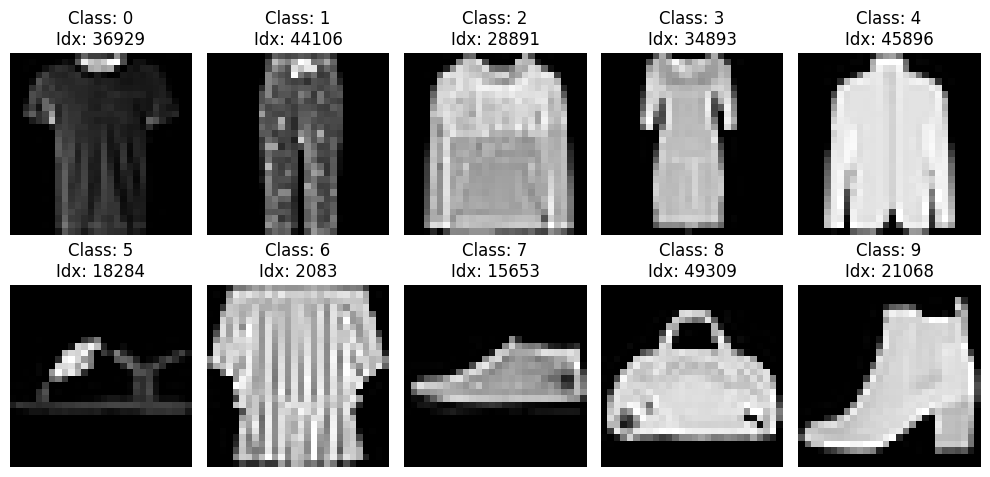

In [8]:
describe_image_dataset(
    x_train_Fmnist, y_train_Fmnist, 
    x_test_Fmnist, y_test_Fmnist,
    class_names=[str(i) for i in range(10)],
    cmap="gray"
)

## Cifar10

----- Dataset Description -----
Train data: 50000 images (32 × 32 pixels, 3 channels)
Test data : 10000 images (32 × 32 pixels, 3 channels)
Number of classes: 10
--------------------------------


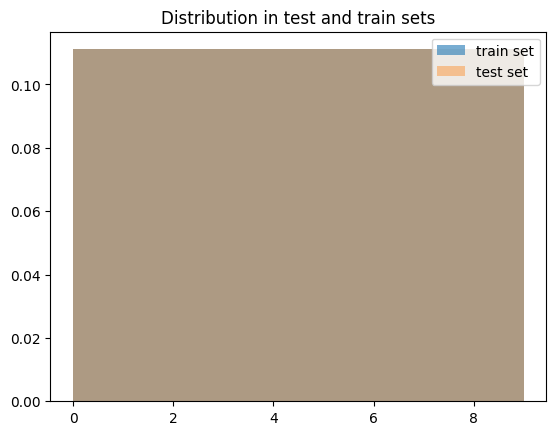

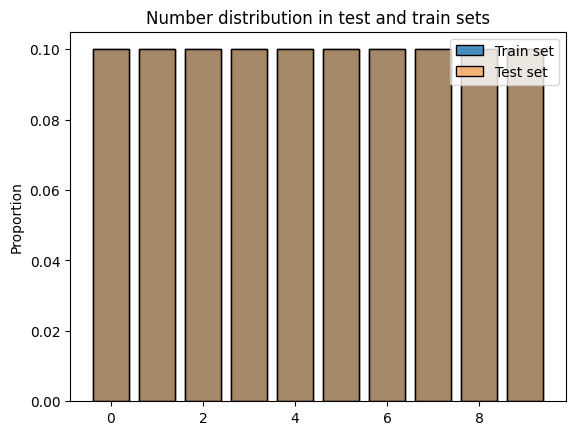

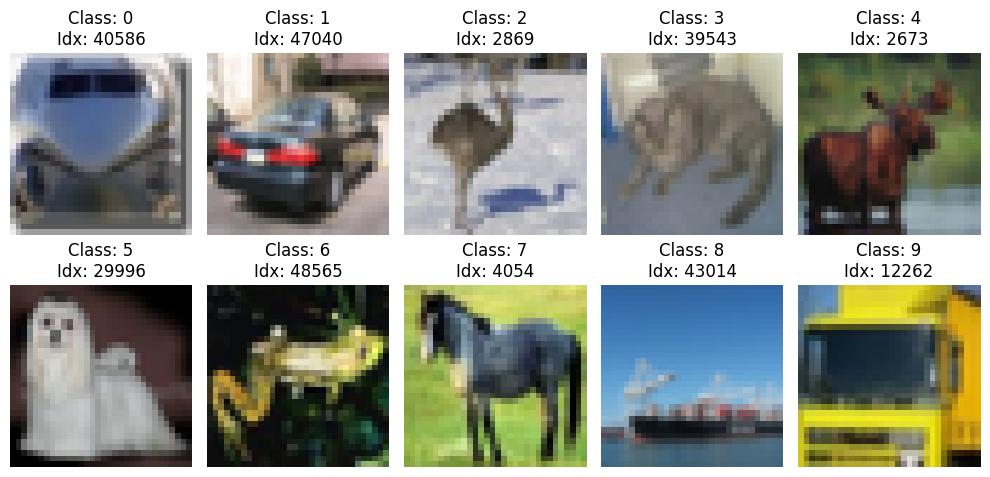

In [9]:
describe_image_dataset(
    x_train_cifar10, y_train_cifar10, 
    x_test_Fmnist, y_test_Fmnist,
    class_names=[str(i) for i in range(10)],
    cmap="gray"
)

## Convolutional Neural Network (CNN or ConvNet)

On va commencer par la classification pa CNN
### Data format

L'architecture de convolution prend en entrée des **images** et non des vecteurs 1D. Cependant, un certain formatage des données reste nécessaire.

Une **troisième dimension** est requise : la dimension des **canaux** (ou *channels*), qui permet de décrire chaque pixel.
- Dans notre cas, cette dimension a une taille de **1**, car les images sont en niveaux de gris (ex. : MNIST, Fashion-MNIST).
- Pour les images en couleur (comme CIFAR-10), chaque pixel est codé par **plusieurs valeurs** (généralement 3 valeurs pour les canaux **RGB** : Rouge, Vert, Bleu).

Ainsi, il est nécessaire de **redimensionner** les images :
- Pour MNIST/Fashion-MNIST : passer d'une dimension **$28 \times 28$** à **$28 \times 28 \times 1$**.
- Pour CIFAR-10 : passer d'une dimension **$32 \times 32$** à **$32 \times 32 \times 3$** (pour inclure les 3 canaux RGB)

In [ ]:
def convert_images(x, grayscale=True):
    """
    Convert dataset images into the correct CNN format using np.expand_dims.
    
    Parameters
    ----------
    x : np.ndarray
        Input image array with shape (N, H, W) or (N, H, W, C).
    grayscale : bool
        If True: ensure output is (N, H, W, 1)
        If False: keep original channels (RGB case).
    
    Returns
    -------
    np.ndarray
        Converted array ready for CNN input.
    """
    
    # Case: images already have a channel dimension
    if x.ndim == 4:
        # If grayscale requested but images already have RGB channels, keep as is
        # because expand_dims is not needed.
        return x
    
    # Case: images shaped (N, H, W), typical of MNIST/F-MNIST
    if x.ndim == 3:
        if grayscale:
            # Add channel dimension: (N, H, W, 1)
            return np.expand_dims(x, axis=-1)
        else:
            # No channel added (not expected for MNIST, but supported)
            return x
    
    raise ValueError("Input array must have shape (N,H,W) or (N,H,W,C).")

## For MNIST dataset
x_train_conv_mnist = convert_images(x_train_mnist, grayscale=True)
x_test_conv_mnist  = convert_images(x_test_mnist, grayscale=True)

print("Train data:", x_train_conv_mnist.shape)
print("Test data :", x_test_conv_mnist.shape)

## For FashionMNIST dataset
x_train_conv_Fmnist = convert_images(x_train_Fmnist, grayscale=True)
x_test_conv_Fmnist  = convert_images(x_test_Fmnist, grayscale=True)

print("Train data:", x_train_conv_Fmnist.shape)
print("Test data :", x_test_conv_Fmnist.shape)

## For Cifar10 dataset
x_train_conv_cifar10 = convert_images(x_train_cifar10, grayscale=False)
x_test_conv_cifar10  = convert_images(x_test_cifar10, grayscale=False)

print("Train data:", x_train_conv_cifar10.shape)
print("Test data :", x_test_conv_cifar10.shape)

Train data: (60000, 28, 28, 1)
Test data : (10000, 28, 28, 1)
Train data: (60000, 28, 28, 1)
Test data : (10000, 28, 28, 1)
Train data: (50000, 32, 32, 3)
Test data : (10000, 32, 32, 3)


### Architecture pour des images gray scale

On commence directement avec la dernière architecture qu'on a introduit dans le TP MNIST (on test pour le moment une architecture pour le gray scale et une autre pour des images de couleurs).  

Nous allons maintenant concevoir une architecture plus complexe pour essayer d'améliorer les résultats de la classification :
- Une couche **`Conv2D`** avec **32 filtres de taille $3 \times 3$** et la fonction d'activation **`ReLU`**,
- Une couche **`Conv2D`** avec **64 filtres de taille $3 \times 3$** et la fonction d'activation **`ReLU`**,
- Une couche **`MaxPooling`** avec une fenêtre de taille **$2 \times 2$**,
- Une couche **`Dropout`** avec un taux d'abandon de **25 %**,
- Une couche **`Flatten`**,
- Une couche **`Dense`** avec **128 neurones** et la fonction d'activation **`ReLU`**,
- Une couche **`Dropout`** avec un taux d'abandon de **50 %**,
- Une couche **`Dense`** avec **10 neurones** et la fonction d'activation **`softmax`**.


In [22]:
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import Adadelta
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import MaxPool2D, MaxPooling2D
from sklearn.metrics import confusion_matrix

ModelCNN_1 est pour MNIST et ModelCNN_2 est pour FashioMNIST.

In [38]:
ModelCNN_1 = Sequential()
ModelCNN_1.add(Input(shape=(28, 28, 1)))
ModelCNN_1.add(Conv2D(filters=32, kernel_size=(3, 3), strides=1, activation='relu'))
ModelCNN_1.add(Conv2D(filters=64, kernel_size=(3, 3), strides=1, activation='relu'))
ModelCNN_1.add(MaxPool2D(pool_size=(2, 2)))
ModelCNN_1.add(Dropout(0.25))
ModelCNN_1.add(Flatten())
ModelCNN_1.add(Dense(units=128, activation='relu'))
ModelCNN_1.add(Dropout(0.5))
ModelCNN_1.add(Dense(units=N_classes, activation='softmax'))
ModelCNN_1.summary()

# Configuration du réseau
ModelCNN_1.compile(loss="sparse_categorical_crossentropy",
              optimizer=Adam(),
              metrics=['accuracy'])

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,199,882 (4.58 MB)

 Trainable params: 1,199,882 (4.58 MB)

 Non-trainable params: 0 (0.00 B)

In [39]:
ModelCNN_2 = Sequential()
ModelCNN_2.add(Input(shape=(28, 28, 1)))
ModelCNN_2.add(Conv2D(filters=32, kernel_size=(3, 3), strides=1, activation='relu'))
ModelCNN_2.add(Conv2D(filters=64, kernel_size=(3, 3), strides=1, activation='relu'))
ModelCNN_2.add(MaxPool2D(pool_size=(2, 2)))
ModelCNN_2.add(Dropout(0.25))
ModelCNN_2.add(Flatten())
ModelCNN_2.add(Dense(units=128, activation='relu'))
ModelCNN_2.add(Dropout(0.5))
ModelCNN_2.add(Dense(units=N_classes, activation='softmax'))
ModelCNN_2.summary()

# Configuration du réseau
ModelCNN_2.compile(loss="sparse_categorical_crossentropy",
              optimizer=Adam(),
              metrics=['accuracy'])


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,199,882 (4.58 MB)

 Trainable params: 1,199,882 (4.58 MB)

 Non-trainable params: 0 (0.00 B)

## Entrainement pour MNIST et FashionMNIST

In [40]:
# Network training
batch_size=128
epochs=10

t_train_ModelCNN_1 = time.time()
history_1=ModelCNN_1.fit(x_train_conv_mnist, y_train_mnist,
          batch_size = batch_size,
          epochs = epochs,
          verbose = 1,
          validation_data = (x_test_conv_mnist, y_test_mnist))
t_train_ModelComplex= time.time() - t_train_ModelCNN_1

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.8409 - loss: 0.7864 - val_accuracy: 0.9784 - val_loss: 0.0642
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9557 - loss: 0.1562 - val_accuracy: 0.9830 - val_loss: 0.0536
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9672 - loss: 0.1136 - val_accuracy: 0.9868 - val_loss: 0.0460
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9734 - loss: 0.0902 - val_accuracy: 0.9884 - val_loss: 0.0392
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9773 - loss: 0.0763 - val_accuracy: 0.9900 - val_loss: 0.0362
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9783 - loss: 0.0705 - val_accuracy: 0.9885 - val_loss: 0.0403
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9801 - loss: 0.0633 - val_accuracy: 0.9890 - val_loss: 0.0417
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9819 - loss: 0.0588 - val_accuracy: 0

In [41]:
# Network training
batch_size=128
epochs=10

t_train_ModelCNN_2 = time.time()
history_2=ModelCNN_2.fit(x_train_conv_Fmnist, y_train_Fmnist,
          batch_size = batch_size,
          epochs = epochs,
          verbose = 1,
          validation_data = (x_test_conv_Fmnist, y_test_Fmnist))
t_train_ModelComplex= time.time() - t_train_ModelCNN_2

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.7707 - loss: 1.1215 - val_accuracy: 0.8604 - val_loss: 0.3749
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8525 - loss: 0.4157 - val_accuracy: 0.8730 - val_loss: 0.3467
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8672 - loss: 0.3621 - val_accuracy: 0.8815 - val_loss: 0.3102
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8782 - loss: 0.3300 - val_accuracy: 0.8954 - val_loss: 0.2906
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8892 - loss: 0.3032 - val_accuracy: 0.8942 - val_loss: 0.2908
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8928 - loss: 0.2859 - val_accuracy: 0.9001 - val_loss: 0.2757
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9014 - loss: 0.2669 - val_accuracy: 0.9025 - val_loss: 0.2836
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9047 - loss: 0.2555 - val_accuracy: 0

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Test loss: 0.04291757196187973
Test accuracy: 0.9873999953269958
Temps d'exécution : 1764516573.68 secondes


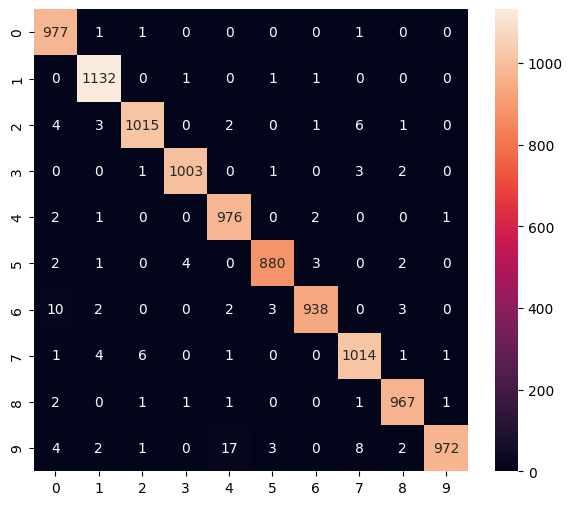

In [42]:
score_ModelCNN_1 = ModelCNN_1.evaluate(x_test_conv_mnist, y_test_mnist, verbose=0)
predict_ModelCNN_1 = ModelCNN_1.predict(x_test_conv_mnist)

print('Test loss:', score_ModelCNN_1[0])
print('Test accuracy:', score_ModelCNN_1[1])
print("Temps d'exécution : %.2f secondes" % t_train_ModelCNN_1)

fig = plt.figure(figsize=(7, 6))
ax = fig.add_subplot(1, 1, 1)
ax = sns.heatmap(
    pd.DataFrame(confusion_matrix(y_test_mnist, predict_ModelCNN_1.argmax(1))),
    annot=True,
    fmt="d"
)


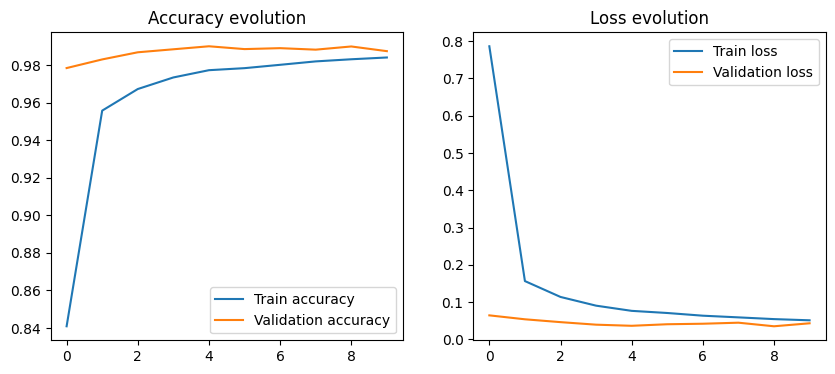

In [43]:
# --- Plot training accuracy ---
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history_1.history['accuracy'], label='Train accuracy')
plt.plot(history_1.history['val_accuracy'], label='Validation accuracy')
plt.title("Accuracy evolution")
plt.legend()

# --- Plot training loss ---
plt.subplot(1,2,2)
plt.plot(history_1.history['loss'], label='Train loss')
plt.plot(history_1.history['val_loss'], label='Validation loss')
plt.title("Loss evolution")
plt.legend()

plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Test loss: 0.26099085807800293
Test accuracy: 0.9085999727249146
Temps d'exécution : 1764516603.35 secondes


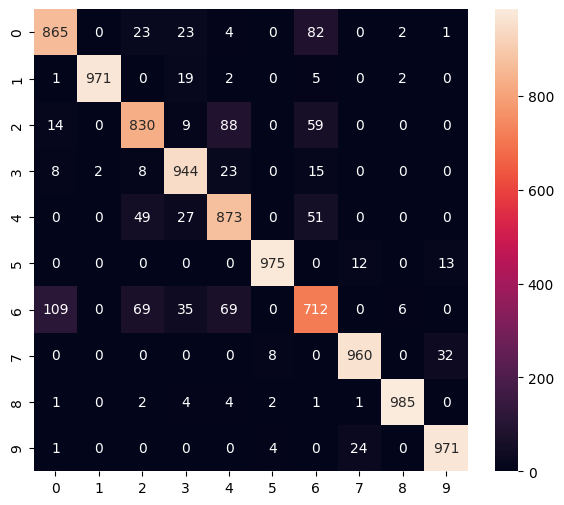

In [44]:
score_ModelCNN_2 = ModelCNN_2.evaluate(x_test_conv_Fmnist, y_test_Fmnist, verbose=0)
predict_ModelCNN_2 = ModelCNN_2.predict(x_test_conv_Fmnist)

print('Test loss:', score_ModelCNN_2[0])
print('Test accuracy:', score_ModelCNN_2[1])
print("Temps d'exécution : %.2f secondes" % t_train_ModelCNN_2)

fig = plt.figure(figsize=(7, 6))
ax = fig.add_subplot(1, 1, 1)
ax = sns.heatmap(
    pd.DataFrame(confusion_matrix(y_test_Fmnist, predict_ModelCNN_2.argmax(1))),
    annot=True,
    fmt="d"
)


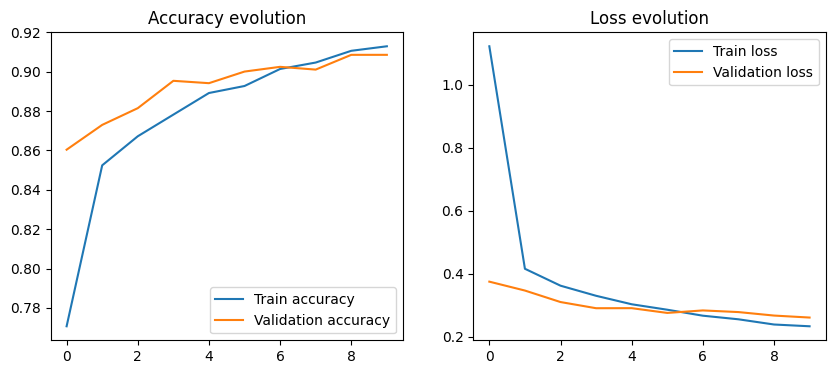

In [45]:
# --- Plot training accuracy ---
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history_2.history['accuracy'], label='Train accuracy')
plt.plot(history_2.history['val_accuracy'], label='Validation accuracy')
plt.title("Accuracy evolution")
plt.legend()

# --- Plot training loss ---
plt.subplot(1,2,2)
plt.plot(history_2.history['loss'], label='Train loss')
plt.plot(history_2.history['val_loss'], label='Validation loss')
plt.title("Loss evolution")
plt.legend()

plt.show()

On peut tester la classification des deux réseaux sur l'autre dataset. On s'attend de façon évidente à ce que la précision soit très faible. 

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 674us/step
Test loss: 5.285816192626953
Test accuracy: 0.08079999685287476
Temps d'exécution : 1764516573.68 secondes


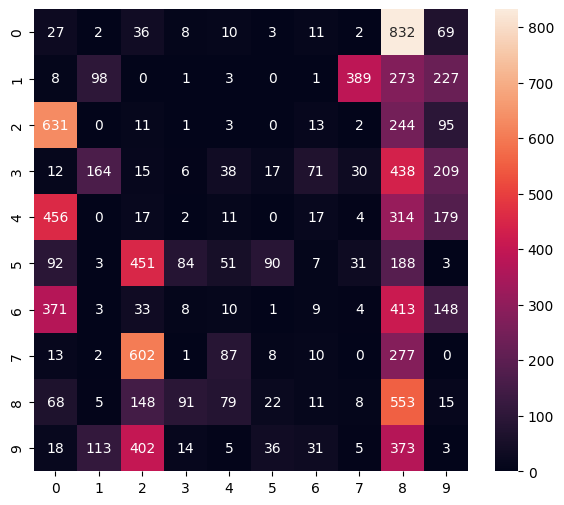

In [46]:
score_ModelCNN_1 = ModelCNN_1.evaluate(x_test_conv_Fmnist, y_test_Fmnist, verbose=0)
predict_ModelCNN_1 = ModelCNN_1.predict(x_test_conv_Fmnist)

print('Test loss:', score_ModelCNN_1[0])
print('Test accuracy:', score_ModelCNN_1[1])
print("Temps d'exécution : %.2f secondes" % t_train_ModelCNN_1)

fig = plt.figure(figsize=(7, 6))
ax = fig.add_subplot(1, 1, 1)
ax = sns.heatmap(
    pd.DataFrame(confusion_matrix(y_test_Fmnist, predict_ModelCNN_1.argmax(1))),
    annot=True,
    fmt="d"
)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 645us/step
Test loss: 13.100054740905762
Test accuracy: 0.1128000020980835
Temps d'exécution : 1764516603.35 secondes


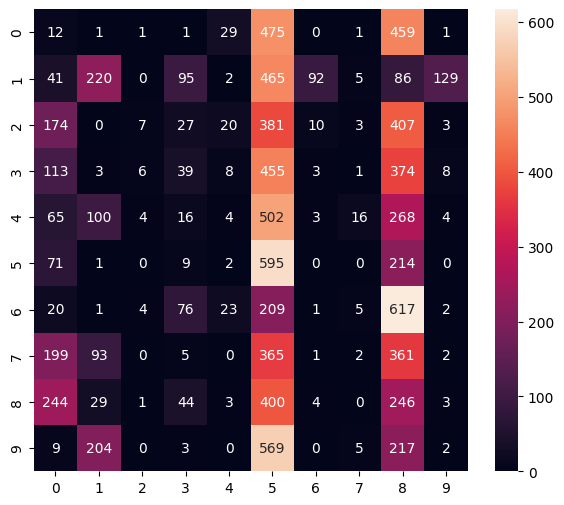

In [47]:
score_ModelCNN_2 = ModelCNN_2.evaluate(x_test_conv_mnist, y_test_mnist, verbose=0)
predict_ModelCNN_2 = ModelCNN_2.predict(x_test_conv_mnist)

print('Test loss:', score_ModelCNN_2[0])
print('Test accuracy:', score_ModelCNN_2[1])
print("Temps d'exécution : %.2f secondes" % t_train_ModelCNN_2)

fig = plt.figure(figsize=(7, 6))
ax = fig.add_subplot(1, 1, 1)
ax = sns.heatmap(
    pd.DataFrame(confusion_matrix(y_test_mnist, predict_ModelCNN_2.argmax(1))),
    annot=True,
    fmt="d"
)


## Achitecture pour des images de couleurs



On va améliorer la précédente achitecture et adapter les entrées et sorties pour avoir 3 canaux RGB. On propose les améliorations suivantes : 
---

### 1. **Augmentation de la profondeur du réseau**
- **Ajout de blocs de convolution supplémentaires** :
  - Passage de 2 à 6 couches `Conv2D` organisées en 3 blocs (32 → 64 → 128 filtres).
  - Chaque bloc est suivi d'une couche `MaxPooling2D` pour réduire la dimension spatiale.
- **Objectif** : Capturer des caractéristiques plus complexes et hiérarchiques (bords → textures → motifs).

---

### 2. **Normalisation par lots (`BatchNormalization`)**
- **Ajout après chaque couche `Conv2D`** :
  - Stabilise et accélère l'apprentissage en normalisant les activations.
  - Réduit la sensibilité à l'initialisation des poids.
- **Avantage** : Permet d'utiliser des taux d'apprentissage plus élevés et réduit le risque de surapprentissage.

---

### 3. **Augmentation progressive des filtres**
- **Structure pyramidale** :
  - Bloc 1 : 32 filtres (caractéristiques basiques).
  - Bloc 2 : 64 filtres (motifs intermédiaires).
  - Bloc 3 : 128 filtres (motifs complexes).
- **Pourquoi ?** : Adapte la capacité du modèle à la complexité croissante des caractéristiques.

---

### 4. **Renforcement de la partie entièrement connectée**
- **Ajout d'une couche `Dense` supplémentaire** :
  - Passage de 1 à 2 couches cachées (256 → 128 neurones).
  - Couche de `Dropout(0.5)` entre les deux pour régulariser.
- **Bénéfice** : Meilleure capacité de classification sans surapprentissage.

---

### 5. **Optimiseur `Adam` avec taux d'apprentissage adapté**
- **Remplacement de `Adadelta` par `Adam(learning_rate=0.001)`** :
  - Convergence plus rapide et plus stable.
  - Compatible avec `BatchNormalization`.


In [52]:
from tensorflow.keras.layers import BatchNormalization

ModelCNN_RGB = Sequential()
ModelCNN_RGB.add(Input(shape=(32, 32, 3)))

# Bloc 1
ModelCNN_RGB.add(Conv2D(filters=32, kernel_size=(3, 3), strides=1, padding='same', activation='relu'))
ModelCNN_RGB.add(BatchNormalization())
ModelCNN_RGB.add(Conv2D(filters=32, kernel_size=(3, 3), strides=1, padding='same', activation='relu'))
ModelCNN_RGB.add(BatchNormalization())
ModelCNN_RGB.add(MaxPool2D(pool_size=(2, 2)))

# Bloc 2
ModelCNN_RGB.add(Conv2D(filters=64, kernel_size=(3, 3), strides=1, padding='same', activation='relu'))
ModelCNN_RGB.add(BatchNormalization())
ModelCNN_RGB.add(Conv2D(filters=64, kernel_size=(3, 3), strides=1, padding='same', activation='relu'))
ModelCNN_RGB.add(BatchNormalization())
ModelCNN_RGB.add(MaxPool2D(pool_size=(2, 2)))

# Bloc 3
ModelCNN_RGB.add(Conv2D(filters=128, kernel_size=(3, 3), strides=1, padding='same', activation='relu'))
ModelCNN_RGB.add(BatchNormalization())
ModelCNN_RGB.add(Conv2D(filters=128, kernel_size=(3, 3), strides=1, padding='same', activation='relu'))
ModelCNN_RGB.add(BatchNormalization())
ModelCNN_RGB.add(MaxPool2D(pool_size=(2, 2)))

ModelCNN_RGB.add(Dropout(0.25))

# Partie entièrement connectée
ModelCNN_RGB.add(Flatten())
ModelCNN_RGB.add(Dense(units=256, activation='relu'))
ModelCNN_RGB.add(Dropout(0.5))
ModelCNN_RGB.add(Dense(units=128, activation='relu'))
ModelCNN_RGB.add(Dropout(0.5))
ModelCNN_RGB.add(Dense(units=N_classes, activation='softmax'))

ModelCNN_RGB.summary()

# Compilation
ModelCNN_RGB.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 10)             │         1,29

 Total params: 847,530 (3.23 MB)

 Trainable params: 846,634 (3.23 MB)

 Non-trainable params: 896 (3.50 KB)

Pour l'entrainement on garde la même taille de batch mais on va prendre 20 epochs pour permettre au modèle de s'entrainer plus longtemps. 

In [53]:
# --- Compile the RGB CNN model ---
epochs=10
batch_size=128
# --- Train the model on CIFAR-10 ---
history = ModelCNN_RGB.fit(
    x_train_conv_cifar10, 
    y_train_cifar10,
    validation_data=(x_test_conv_cifar10, y_test_cifar10),
    epochs=epochs,
    batch_size=batch_size,
    verbose=1
)


Epoch 1/10


2025-11-30 16:40:45.842419: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-11-30 16:40:45.842533: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-11-30 16:40:46.769385: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_3641', 64 bytes spill stores, 64 bytes spill loads

2025-11-30 16:40:46.980869: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning :

390/391 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2446 - loss: 2.2321

2025-11-30 16:40:56.389197: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-11-30 16:40:56.389311: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-11-30 16:40:57.632882: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_2203', 11756 bytes spill stores, 11088 bytes spill loads



391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.2448 - loss: 2.2312

2025-11-30 16:41:03.448234: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_241', 8 bytes spill stores, 8 bytes spill loads

2025-11-30 16:41:03.555383: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_241', 8 bytes spill stores, 8 bytes spill loads



391/391 ━━━━━━━━━━━━━━━━━━━━ 22s 32ms/step - accuracy: 0.3160 - loss: 1.8971 - val_accuracy: 0.4419 - val_loss: 1.6277
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.5176 - loss: 1.3698 - val_accuracy: 0.6148 - val_loss: 1.1417
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.6157 - loss: 1.1199 - val_accuracy: 0.6181 - val_loss: 1.1532
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.6781 - loss: 0.9539 - val_accuracy: 0.6990 - val_loss: 0.9062
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.7190 - loss: 0.8426 - val_accuracy: 0.7179 - val_loss: 0.8412
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.7493 - loss: 0.7629 - val_accuracy: 0.7071 - val_loss: 0.8567
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.7781 - loss: 0.6744 - val_accuracy: 0.7594 - val_loss: 0.7272
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.7913 - loss: 0.6283 - val_accuracy: 0.77

2025-11-30 16:41:42.722262: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-11-30 16:41:43.205718: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_234', 56 bytes spill stores, 56 bytes spill loads

2025-11-30 16:41:43.307639: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_241', 8 bytes spill stores, 8 bytes spill loads



313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
Test loss: 0.6838312745094299
Test accuracy: 0.7763000130653381
Execution time: 2.36 seconds


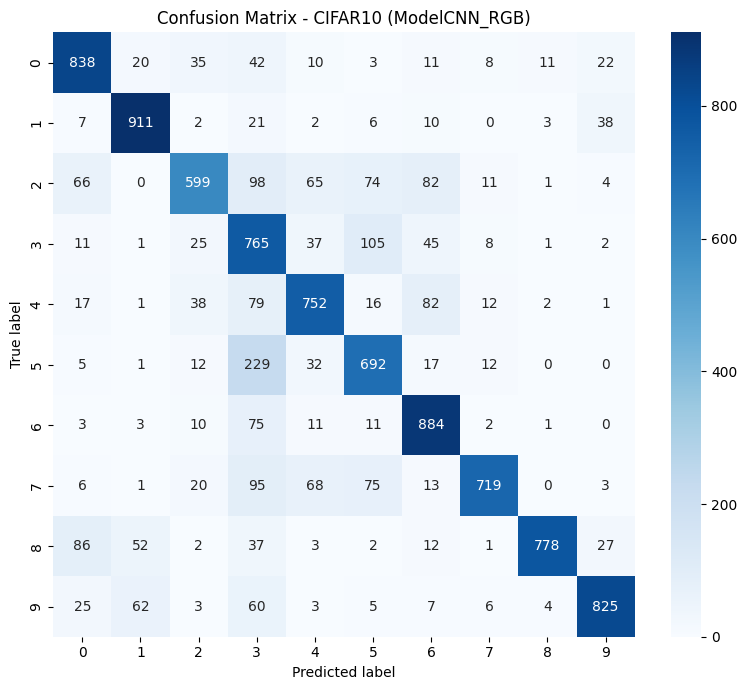

In [54]:
# --- Evaluate the model ---
t0 = time.time()
score_ModelCNN_RGB = ModelCNN_RGB.evaluate(x_test_conv_cifar10, y_test_cifar10, verbose=0)
t_train_ModelCNN_RGB = time.time() - t0

# --- Predictions ---
predict_ModelCNN_RGB = ModelCNN_RGB.predict(x_test_conv_cifar10)

# --- Print performance ---
print('Test loss:', score_ModelCNN_RGB[0])
print('Test accuracy:', score_ModelCNN_RGB[1])
print("Execution time: %.2f seconds" % t_train_ModelCNN_RGB)

# --- Confusion matrix ---
cm = confusion_matrix(y_test_cifar10, predict_ModelCNN_RGB.argmax(1))

# --- Display confusion matrix ---
fig = plt.figure(figsize=(8, 7))
ax = fig.add_subplot(1, 1, 1)

ax = sns.heatmap(
    pd.DataFrame(cm),
    annot=True,
    fmt="d",
    cmap="Blues"
)

plt.title("Confusion Matrix - CIFAR10 (ModelCNN_RGB)")
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.tight_layout()
plt.show()

Test accuracy: 0.7763
Test loss: 0.6838


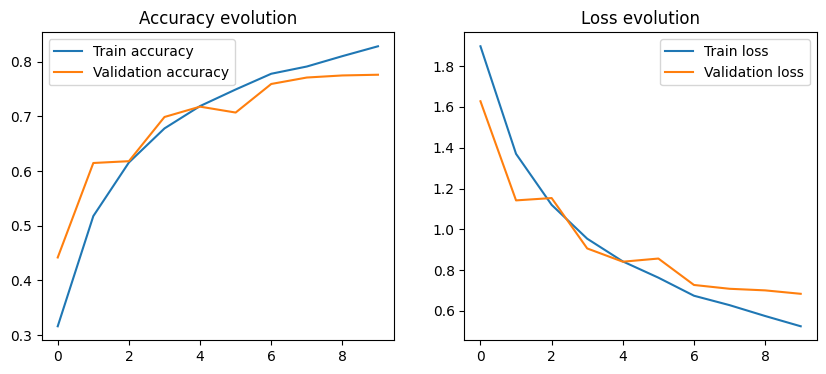

In [55]:
# --- Evaluate on the test set ---
test_loss, test_acc = ModelCNN_RGB.evaluate(x_test_conv_cifar10, y_test_cifar10, verbose=0)
print(f"Test accuracy: {test_acc:.4f}")
print(f"Test loss: {test_loss:.4f}")

# --- Plot training accuracy ---
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title("Accuracy evolution")
plt.legend()

# --- Plot training loss ---
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title("Loss evolution")
plt.legend()

plt.show()